preprocess multi-omics data (provided as fold-change with significant metrics (BH p-value)) for downstream analysis
- data generated and processed in 10.1016/j.ymben.2024.03.007
- data for secRecon analysis obtained from study's supplementary file 1-s2.0-S1096717624000521-mmc3.xlsx
- group data into significantly upreg and downreg for transcriptomics and proteomics data

In [87]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [88]:
# read in multi omics data from Raab et al. supplementary materials; https://doi.org/10.1016/j.ymben.2024.03.007
## multi-omics data provided in supplementary file 1-s2.0-S1096717624000521-mmc3.xlsx

# read in data into dictionary
df = pd.read_excel('../data/1-s2.0-S1096717624000521-mmc3.xlsx',
                     sheet_name=None)
[*df]

['Notes',
 'Transcriptome DE',
 'Proteome DE proteins',
 'Secretome DE proteins',
 'Surfaceome DE',
 'miRNome DE']

In [89]:
# rnaseq data
rna = df['Transcriptome DE'].copy()
rna

,Mmus_Protein_Accession,Hsap_Protein_Accession,Mmus_Genes,Average Murine log2,Average Human log2,Average CHO log2,Average Plasma cells log2,Fold-Change PCD/CHO,Fold-Change CHO/PCD,Fold-Change Murine/Human,...,Fold-Change CHO/Human,p-Value (BH),Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Row,P-Value,Padj(BH)
0,XP_006538554 : NP_067617 : XP_006538557,NP_001292204 : NP_940978 : XP_005244806,Agrn,10.690813,8.291109,0.025850,9.490961,706.776753,-706.776753,5.276948,...,307.674048,1.000001e-35,NaN,NaN,NaN,NaN,NaN,Agrn,1.000001e-35,1.000001e-35
1,NP_035789,XP_016857721,Tnfrsf4,6.454737,2.510726,11.577019,4.482732,-136.644848,136.644848,15.390958,...,-536.075653,1.000001e-35,NaN,NaN,NaN,NaN,NaN,Tnfrsf4,1.000001e-35,1.000001e-35
2,NP_035471,NP_057260,Sdf4,12.563169,11.085460,1.240088,11.824314,1535.216328,-1535.216328,2.785061,...,919.924619,1.000001e-35,NaN,NaN,NaN,NaN,NaN,Sdf4,1.000001e-35,1.000001e-35
3,NP_001177374,NP_872339,Faap20,7.410462,6.875853,-0.018424,7.143158,143.169619,-143.169619,1.448549,...,118.955419,1.000001e-35,NaN,NaN,NaN,NaN,NaN,Faap20,1.000001e-35,1.000001e-35
4,XP_006538893,NP_003811,Tnfrsf14,5.984186,7.712633,-0.200930,6.848409,132.453228,-132.453228,-3.313708,...,241.112452,1.000001e-35,NaN,NaN,NaN,NaN,NaN,Tnfrsf14,1.000001e-35,1.000001e-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,NP_081604,NP_056444,Prpf31,9.673051,9.641640,8.955903,9.657345,1.626130,-1.626130,1.022011,...,1.608524,4.951372e-02,NaN,NaN,NaN,NaN,NaN,Prpf31,2.469814e-02,4.951372e-02
5048,NP_765988,NP_055095,Dnajc8,9.819377,9.637576,10.471602,9.728477,-1.673799,1.673799,1.134299,...,-1.782654,4.960034e-02,NaN,NaN,NaN,NaN,NaN,Dnajc8,2.474627e-02,4.960034e-02
5049,NP_079847,NP_057153,Pam16,7.251510,7.025878,8.164312,7.138694,-2.035831,2.035831,1.169289,...,-2.201419,4.984719e-02,NaN,NaN,NaN,NaN,NaN,Pam16,2.487434e-02,4.984719e-02
5050,NP_033112,NP_001269701,Polr1b,10.351645,9.837112,9.532149,10.094378,1.476549,-1.476549,1.428532,...,1.235387,4.993054e-02,NaN,NaN,NaN,NaN,NaN,Polr1b,2.492086e-02,4.993054e-02


In [90]:
# PREPROCESSING: correct fold-change
rna_mm = 'Fold-Change CHO/Murine'

## NOTE: original column labeled CHO/Murine when the formula actually calculates Murine/CHO
# convert default CHO/Murine FC -->  log2(Murine/CHO FC)
# rna_mm_l2fc = [math.log2(x**-1) if x >= 0 else math.log2(-x) for x in rna[rna_mm]]
rna_mm_l2fc = [math.log2(np.abs(x)**-1) if x < 0 else math.log2(x) for x in rna[rna_mm]]

# convert PCD/CHO FC --> log2(Plasma/CHO FC)
rna_pcd = 'Fold-Change PCD/CHO'
rna_pcd_l2fc = [math.log2(np.abs(x)**-1) if x < 0 else math.log2(x) for x in rna[rna_pcd]]

In [91]:
rna['log2_'+'Fold-Change Murine/CHO'] = rna_mm_l2fc
rna['log2_'+rna_pcd] = rna_pcd_l2fc

In [92]:
rna

,Mmus_Protein_Accession,Hsap_Protein_Accession,Mmus_Genes,Average Murine log2,Average Human log2,Average CHO log2,Average Plasma cells log2,Fold-Change PCD/CHO,Fold-Change CHO/PCD,Fold-Change Murine/Human,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Row,P-Value,Padj(BH),log2_Fold-Change Murine/CHO,log2_Fold-Change PCD/CHO
0,XP_006538554 : NP_067617 : XP_006538557,NP_001292204 : NP_940978 : XP_005244806,Agrn,10.690813,8.291109,0.025850,9.490961,706.776753,-706.776753,5.276948,...,NaN,NaN,NaN,NaN,NaN,Agrn,1.000001e-35,1.000001e-35,10.664963,9.465111
1,NP_035789,XP_016857721,Tnfrsf4,6.454737,2.510726,11.577019,4.482732,-136.644848,136.644848,15.390958,...,NaN,NaN,NaN,NaN,NaN,Tnfrsf4,1.000001e-35,1.000001e-35,-5.122282,-7.094287
2,NP_035471,NP_057260,Sdf4,12.563169,11.085460,1.240088,11.824314,1535.216328,-1535.216328,2.785061,...,NaN,NaN,NaN,NaN,NaN,Sdf4,1.000001e-35,1.000001e-35,11.323081,10.584226
3,NP_001177374,NP_872339,Faap20,7.410462,6.875853,-0.018424,7.143158,143.169619,-143.169619,1.448549,...,NaN,NaN,NaN,NaN,NaN,Faap20,1.000001e-35,1.000001e-35,7.428886,7.161582
4,XP_006538893,NP_003811,Tnfrsf14,5.984186,7.712633,-0.200930,6.848409,132.453228,-132.453228,-3.313708,...,NaN,NaN,NaN,NaN,NaN,Tnfrsf14,1.000001e-35,1.000001e-35,6.185116,7.049339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,NP_081604,NP_056444,Prpf31,9.673051,9.641640,8.955903,9.657345,1.626130,-1.626130,1.022011,...,NaN,NaN,NaN,NaN,NaN,Prpf31,2.469814e-02,4.951372e-02,0.717148,0.701443
5048,NP_765988,NP_055095,Dnajc8,9.819377,9.637576,10.471602,9.728477,-1.673799,1.673799,1.134299,...,NaN,NaN,NaN,NaN,NaN,Dnajc8,2.474627e-02,4.960034e-02,-0.652225,-0.743126
5049,NP_079847,NP_057153,Pam16,7.251510,7.025878,8.164312,7.138694,-2.035831,2.035831,1.169289,...,NaN,NaN,NaN,NaN,NaN,Pam16,2.487434e-02,4.984719e-02,-0.912802,-1.025618
5050,NP_033112,NP_001269701,Polr1b,10.351645,9.837112,9.532149,10.094378,1.476549,-1.476549,1.428532,...,NaN,NaN,NaN,NaN,NaN,Polr1b,2.492086e-02,4.993054e-02,0.819496,0.562229


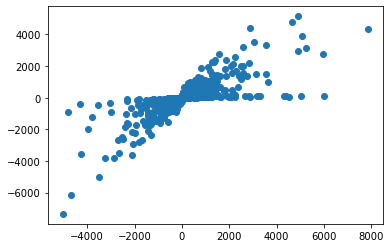

In [93]:
plt.scatter(rna['Fold-Change CHO/Murine'],rna['Fold-Change PCD/CHO'])

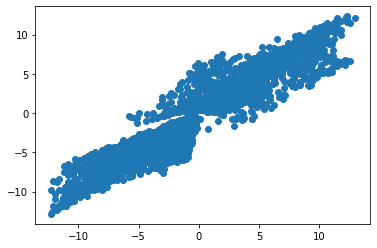

In [94]:
plt.scatter(rna['log2_'+'Fold-Change Murine/CHO'],rna['log2_'+rna_pcd])

In [95]:
# separate to up and downreg 
up_mmcho_rna = rna[rna['log2_'+'Fold-Change Murine/CHO'] > 0].copy()
down_mmcho_rna = rna[rna['log2_'+'Fold-Change Murine/CHO'] < 0].copy()

In [96]:
# preprocess proteomics data
prot = df['Proteome DE proteins'].copy()
prot

,Mmus_Protein_Accession,Hsap_Protein_Accession,Mmus_Genes,Mmus_UniProt,FC PCD/CHO,log2_MPC-11_Rep1_intensity_sum,log2_MPC-11_Rep2_intensity_sum,log2_MPC-11_Rep3_intensity_sum,log2_P3X_Rep1_intensity_sum,log2_P3X_Rep2_intensity_sum,...,log2 CHO-DG44-mAb1_Rep1_intensity_sum,log2 CHO-DG44-mAb1_Rep2_intensity_sum,log2 CHO-DG44-mAb1_Rep3_intensity_sum,log2 CHO-K1-mAb2_Rep1_intensity_sum,log2 CHO-K1-mAb2_Rep2_intensity_sum,log2 CHO-K1-mAb2_Rep3_intensity_sum,-Log Student's T-test p-value CHO_PCD,Student's T-test q-value CHO_PCD,Student's T-test Difference CHO_PCD,Student's T-test Test statistic CHO_PCD
0,NP_001271241 : NP_001271243,NP_477515,Ube2j2,Q6P073;Q8C6A1;Q91Y64;Q9CWY5;Q9DC18;Q9QX58,0.140150,13.629981,16.206366,15.531327,16.234344,15.525386,...,19.174625,19.078819,19.692989,16.942184,18.609709,15.935396,2.573714,0.012773,2.834959,1.652887
1,NP_081175,NP_054907,Ssu72,Q3UF99;Q91YL1;Q9CY97;Q9DB51,0.120875,16.447386,19.518160,14.617719,15.683210,16.816162,...,19.900553,19.906582,20.364241,18.743698,18.824757,20.181566,2.739905,0.009294,3.048412,1.766888
2,XP_017175466,XP_016856548,Gnb1,P04697;P04901;P62874,0.574986,24.201103,23.428997,24.220554,23.529961,23.691942,...,24.615499,24.596956,24.268478,24.477606,24.605297,24.392279,2.727631,0.009477,0.798401,0.670492
3,XP_011248499 : NP_001239583 : XP_017175485 : X...,XP_016858110 : NP_742128 : NP_001186789,Kcnab2,P62482;P97381;Q60942;Q64284,0.009618,14.953743,14.931621,15.241827,16.030876,15.860559,...,18.963562,20.319893,21.006693,23.964472,24.421022,23.383907,4.533434,0.000313,6.700092,3.470405
4,NP_033105,NP_000974,Rpl22,P41104;P67984,449.810030,26.785959,25.114422,25.351450,25.026649,24.761812,...,16.888092,14.993918,16.970833,17.328608,18.209682,14.053506,6.584564,0.000008,-8.813172,-5.107684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,NP_079739,NaN,1810009A15Rik,A0A087WQJ5,5.934548,22.012037,17.326706,19.221766,20.404995,19.291374,...,16.556303,16.324446,16.098948,18.701536,17.809906,15.547006,1.949262,0.040116,-2.569138,-1.404979
1559,NP_033154,NaN,Scd2,P13011;Q8BH96,0.068132,19.611008,19.123032,19.344437,16.545120,15.819427,...,21.922316,21.823395,22.084812,22.026344,21.191690,19.985935,2.952977,0.006212,3.875534,2.085769
1560,NP_034253,NaN,Eif3a,E9QQ50;P23116;Q60697;Q62162,517.582556,27.094154,25.909821,25.868221,25.451754,25.413084,...,13.320550,16.300270,17.193163,17.004406,18.839130,17.436918,6.121767,0.000017,-9.015645,-4.921962
1561,NP_080331,NaN,Rpl39,P02404;P39025;P62892;Q9BYF2,34.822344,22.775042,20.190203,21.970047,22.045767,21.961502,...,15.780203,16.312057,16.051914,17.401264,17.340918,15.375941,5.403087,0.000062,-5.121941,-3.270266


In [97]:
prot['log2_FC PCD/CHO'] = [math.log2(x) for x in prot['FC PCD/CHO']]
prot[['FC PCD/CHO','log2_FC PCD/CHO']]

,FC PCD/CHO,log2_FC PCD/CHO
0,0.140150,-2.834959
1,0.120875,-3.048412
2,0.574986,-0.798401
3,0.009618,-6.700092
4,449.810030,8.813172
...,...,...
1558,5.934548,2.569138
1559,0.068132,-3.875534
1560,517.582556,9.015645
1561,34.822344,5.121941


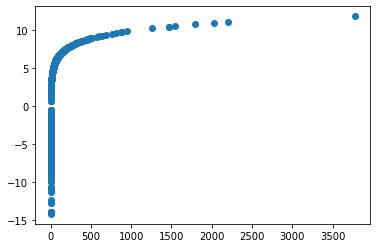

In [98]:
plt.scatter(prot['FC PCD/CHO'],prot['log2_FC PCD/CHO'])

In [99]:
up_prot = prot[prot['log2_FC PCD/CHO'] > 0].copy()
down_prot = prot[prot['log2_FC PCD/CHO'] < 0].copy()

In [101]:
# write preprocessed data as new sheets
rna_cols = rna.columns[:3].tolist() + ['p-Value (BH)'] + ['log2_Fold-Change PCD/CHO','log2_Fold-Change Murine/CHO']
rna_cols

df['upreg-MurinevCHO_RNA'] = up_mmcho_rna[rna_cols].copy()
df['downreg-MurinevCHO_RNA'] = down_mmcho_rna[rna_cols].copy()

In [104]:
prot_cols = ['Mmus_Protein_Accession', 'Hsap_Protein_Accession', 'Mmus_Genes',
       'Mmus_UniProt','log2_FC PCD/CHO']
df['upreg-PCDvCHO_Prot'] = up_prot[prot_cols].copy()
df['downreg-PCDvCHO_Prot'] = down_prot[prot_cols].copy()

In [106]:
# write data into new excel file
import openpyxl

with pd.ExcelWriter('../data/secrecon_1-s2.0-S1096717624000521-mmc3.xlsx', engine='openpyxl') as writer:
    for df_name, d in df.items():
        d.to_excel(writer, sheet_name=df_name)